#### Mariusz Kuchta

Laboratorium 7 - 24.11.21

Analiza i Bazy Danych

##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.

In [2]:
d = pd.read_csv('SCORES.csv')
d.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")

<AxesSubplot:title={'center':'Wyniki egzaminu w zależności od godzin nauki'}, xlabel='Hours', ylabel='Scores'>

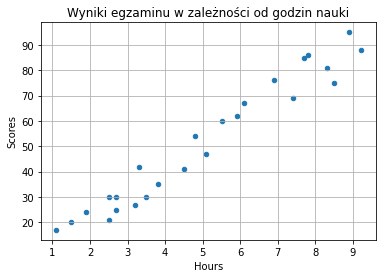

In [3]:
d.plot.scatter(x="Hours", y="Scores", title="Wyniki egzaminu w zależności od godzin nauki", grid=True)

4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)

In [4]:
dt = d.sample(frac = 0.3)  # for training
dv = d.drop(dt.index)  # for validation

dt.head()

,Hours,Scores
19,7.4,69
20,2.7,30
17,1.9,24
11,5.9,62
4,3.5,30


5. Utwróz model regresji liniowej za pomocą sklearn.

In [5]:
regr = LinearRegression(fit_intercept = True, copy_X = True).fit(dt["Hours"].to_numpy().reshape(-1, 1), dt["Scores"])

6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?

In [6]:
print(regr.coef_)
print(regr.intercept_)

[8.97455255]
5.99896197036896


Wartości `coef_` są współczynnikami modelu liniowego ($\beta_{1...n}$). Są one odpowiednio mnożone dla każdej zmniennej wejściowej modelu. W celach normalizacyjnych konieczne jest jednak wprowadzanie dodatkowego współczynnika afinicznego $\beta_0$. Poprawia on dokładność predykcji uwzględniając składowe stałe obecne w rzeczywistym procesie. W obiekcie modelu regresji liniowej pakietu `scikit-learn` jest on dostępny pod atryburtem `intercept_`.

7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).

In [7]:
Yprd = regr.predict(dv["Hours"].to_numpy().reshape(-1, 1))

8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)

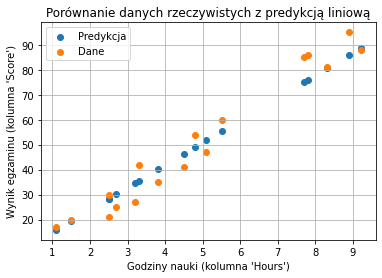

In [8]:
plt.figure()
plt.scatter(dv["Hours"], Yprd)
plt.scatter(dv["Hours"], dv["Scores"])
plt.legend(["Predykcja", "Dane"])
plt.title("Porównanie danych rzeczywistych z predykcją liniową")
plt.xlabel("Godziny nauki (kolumna \'Hours\')")
plt.ylabel("Wynik egzaminu (kolumna \'Score\')")
plt.grid('on')

9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

In [9]:
mae_err = mean_absolute_error(dv["Scores"], Yprd)  # mean absolute error
msq_err = mean_squared_error(dv["Scores"], Yprd)  # mean squared error
mrt_err = mean_squared_error(dv["Scores"], Yprd, squared=False)  # root mean squared error

print(f"""Średni błąd bezwzględny: \t\t {mae_err:.2f}
Bład średniokwadratowy: \t\t {msq_err:.2f}
Pierwiastek błędu średniokwadratowego: \t {mrt_err:.2f}""")

Średni błąd bezwzględny: 		 5.00
Bład średniokwadratowy: 		 34.84
Pierwiastek błędu średniokwadratowego: 	 5.90


### Cz. 2

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [10]:
d = pd.read_csv('SBP.csv')
d.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


<AxesSubplot:title={'center':'Ciśnienie (SBP) w zależności od wieku'}, xlabel='Wiek', ylabel='Ciśnienie'>

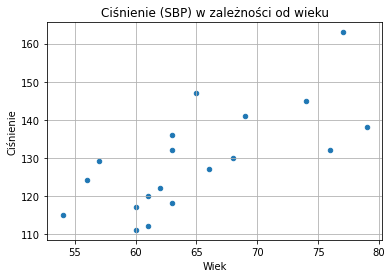

In [11]:
d.plot.scatter(x="Age", y="SBP", title="Ciśnienie (SBP) w zależności od wieku", xlabel="Wiek", ylabel="Ciśnienie", grid=True)

In [12]:
dt = d.sample(frac = 0.3)  # for training
dv = d.drop(dt.index)  # for validation

dt.head()

,Age,SBP
4,63,132
16,69,141
10,63,118
18,62,122
1,61,120


In [13]:
regr = LinearRegression(fit_intercept = True, copy_X = True).fit(dt["Age"].to_numpy().reshape(-1, 1), dt["SBP"])

In [14]:
print(regr.coef_)
print(regr.intercept_)

[2.66]
-42.579999999999984


In [15]:
Yprd = regr.predict(dv["Age"].to_numpy().reshape(-1, 1))

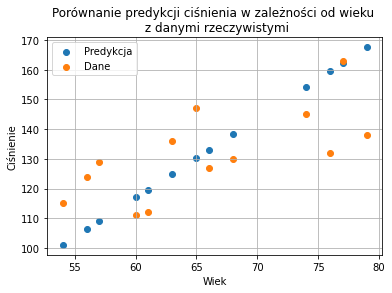

In [16]:
plt.figure()
plt.scatter(dv["Age"], Yprd)
plt.scatter(dv["Age"], dv["SBP"])
plt.legend(["Predykcja", "Dane"])
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie")
plt.title("Porównanie predykcji ciśnienia w zależności od wieku \n z danymi rzeczywistymi")
plt.grid('on')

In [17]:
mae_err = mean_absolute_error(dv["SBP"], Yprd)  # mean absolute error
msq_err = mean_squared_error(dv["SBP"], Yprd)  # mean squared error
mrt_err = mean_squared_error(dv["SBP"], Yprd, squared=False)  # root mean squared error

print(f"""Średni błąd bezwzględny: \t\t {mae_err:.2f}
Błąd średniokwadratowy: \t\t {msq_err:.2f}
Pierwiastek błędu średniokwadratowego: \t {mrt_err:.2f}""")

Średni błąd bezwzględny: 		 13.41
Błąd średniokwadratowy: 		 247.93
Pierwiastek błędu średniokwadratowego: 	 15.75


Uzyskane przewidywania nie są do końca zadowalające. Istnieją duże różnice między predykcją a danymi rzeczywistymi. Regresja liniowa bardzo "wygładza" model i nie jest w stanie "dopasować" się do wartości, które bardziej odbiegają od trendu.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [18]:
d = pd.read_csv("PETROL.csv")
d.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


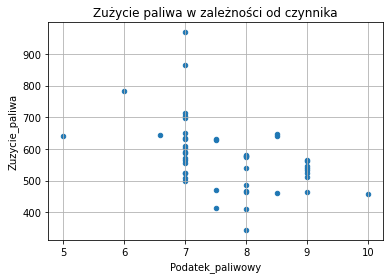

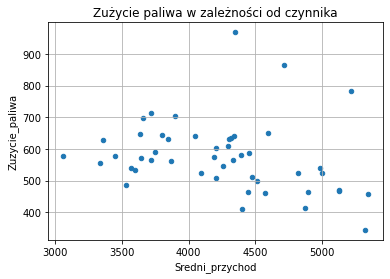

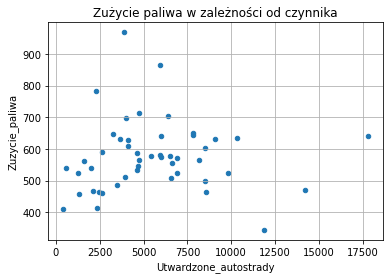

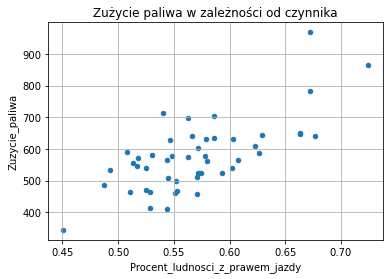

In [19]:
x_cols = ["Podatek_paliwowy", "Sredni_przychod", "Utwardzone_autostrady", "Procent_ludnosci_z_prawem_jazdy"]

for xcol in x_cols:
    d.plot.scatter(y="Zuzycie_paliwa", x=xcol, title="Zużycie paliwa w zależności od czynnika", grid=True)

In [20]:
dt = d.sample(frac = 0.3)  # for training
dv = d.drop(dt.index)  # for validation

In [21]:
regr = LinearRegression(fit_intercept=True, copy_X=True)\
    .fit(dt[x_cols],
         dt["Zuzycie_paliwa"])

In [22]:
print(regr.coef_)
print(regr.intercept_)

[-5.35510637e+01 -6.92122961e-02 -7.29659311e-03  1.18577494e+03]
650.1986878124877


In [23]:
Yprd = regr.predict(dv[x_cols])

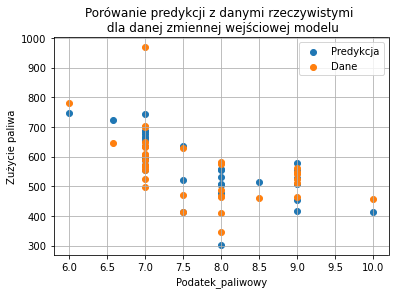

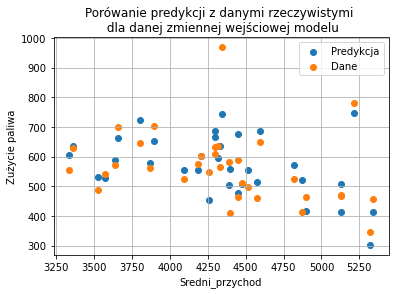

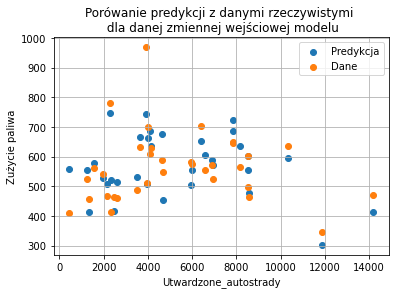

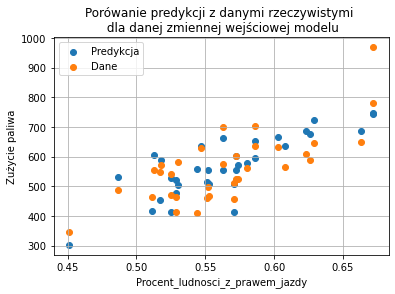

In [24]:
for xcol in x_cols:
    plt.figure()
    plt.scatter(dv[xcol], Yprd)
    plt.scatter(dv[xcol], dv["Zuzycie_paliwa"])
    plt.legend(["Predykcja", "Dane"])
    plt.xlabel(xcol)
    plt.ylabel("Zużycie paliwa")
    plt.title("Porówanie predykcji z danymi rzeczywistymi \n dla danej zmiennej wejściowej modelu")
    plt.grid("on")

In [25]:
mea_err = mean_absolute_error(dv["Zuzycie_paliwa"], Yprd)
msq_err = mean_squared_error(dv["Zuzycie_paliwa"], Yprd)
mrt_err = mean_squared_error(dv["Zuzycie_paliwa"], Yprd, squared=False)

print(f"""Średni błąd bezwzględny: \t\t {mae_err:.2f}
Błąd średniokwadratowy: \t\t {msq_err:.2f}
Pierwiastek błędu średniokwadratowego: \t {mrt_err:.2f}""")

Średni błąd bezwzględny: 		 13.41
Błąd średniokwadratowy: 		 4693.26
Pierwiastek błędu średniokwadratowego: 	 68.51


Uzyskane wyniki predykcji są akceptowalne. Co prawda przewidywania mogłyby być lepsze dla pojedynczych rekordów, jednak otrzymany model dobrze reprezentuje trendy dla poszczególnych zestawów zmiennych wejściowych.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.

In [26]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.

In [27]:
d = pd.read_csv("HEART.csv")
d.rename(columns={"num       ":"num"}, inplace=True)
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.

In [28]:
d.replace("?", float("NaN"), inplace=True)
d.dropna(thresh=14-3, inplace=True)
d.reset_index(drop=True, inplace=True)
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
3,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
4,32,0,2,105,198,0,0,165,0,0.0,NaN,NaN,NaN,0


4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.

In [29]:
# dd = pd.get_dummies(d, columns=["cp", "restecg", "slope", "ca", "thal"])
dd = pd.get_dummies(d, columns=["cp", "restecg"])
dd.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,NaN,NaN,NaN,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,NaN,NaN,NaN,0,0,1,0,0,1,0,0
2,30,0,170,237,0,170,0,0.0,NaN,NaN,6,0,1,0,0,0,0,1,0
3,31,0,100,219,0,150,0,0.0,NaN,NaN,NaN,0,0,1,0,0,0,1,0
4,32,0,105,198,0,165,0,0.0,NaN,NaN,NaN,0,0,1,0,0,1,0,0


5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).

In [30]:
xcols = ["age","sex","cp_1","cp_2","cp_3","cp_4","trestbps","chol","fbs","restecg_0","restecg_1","restecg_2","thalach","exang","oldpeak","slope","ca","thal"]
# xcols = ["age","sex","cp_1","cp_2","cp_3","cp_4","trestbps","chol","fbs","restecg_0","restecg_1","restecg_2","thalach","exang","oldpeak"]
# xcols += ["ca_0", "slope_1", "slope_2", "slope_3", "thal_3", "thal_6", "thal_7"]
ycols = ["num"]

impmed = SimpleImputer(missing_values=float("NaN"), strategy='median')
ddimp = impmed.fit_transform(dd)
dd = pd.DataFrame(ddimp, columns=list(dd.columns))

dt = dd.sample(frac = 0.2)  # for training
dv = dd.drop(dt.index)  # for validation

dt.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
10,34.0,1.0,98.0,220.0,0.0,150.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16,36.0,1.0,112.0,340.0,0.0,184.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
101,50.0,1.0,140.0,129.0,0.0,135.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
172,35.0,1.0,110.0,257.0,0.0,140.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
158,58.0,1.0,135.0,222.0,0.0,100.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


6. Utwróz model regresji logistycznej.

In [31]:
clf = LogisticRegression(fit_intercept=True, max_iter=1000).fit(dt[xcols].to_numpy(), dt[ycols])

/home/student/.conda/envs/mariuszkuchta/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [32]:
clf.score(dv[xcols], dv[ycols])

0.8073394495412844